In [5]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Step1: Data Collection
wq=pd.read_csv('winequality_red.csv') #loading the dataset to the dataframe

In [7]:
wq.shape #printing the number of rows and columns

(1599, 12)

In [8]:
wq.head() #printing first 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wq.isnull().sum() #checking for any missing values in the dataset and summing them up

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#statistical measures of the dataset
wq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


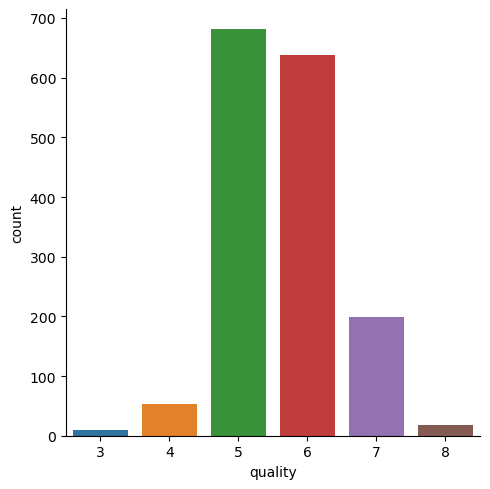

In [15]:
#Getting number of values for each quality 
sns.catplot(x='quality',data=wq,kind='count')

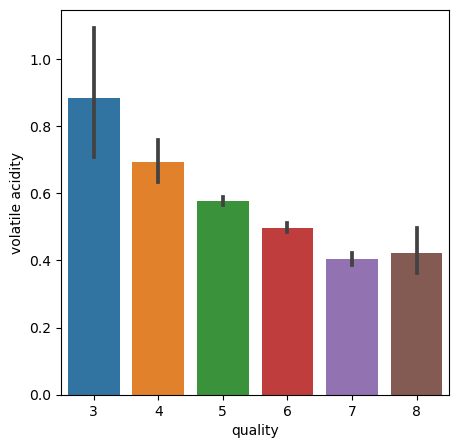

In [26]:
# Plot of volatile acidity vs quality
plt.figure(figsize=(5,5)) # giving size of plot 5x5
sns.barplot(x='quality',y='volatile acidity',data=wq) # barplot showing relationship between volatile acidity and quality
plt.show() # displaying the graph

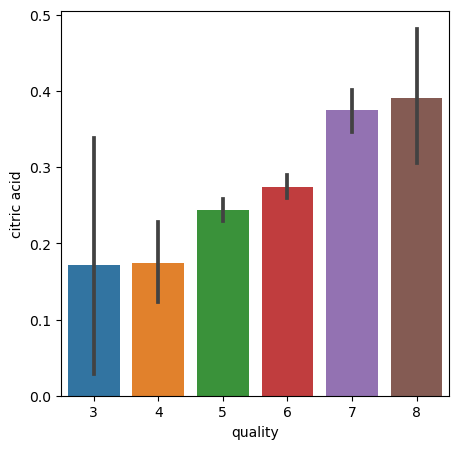

In [27]:
#citric acid vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wq)
plt.show()

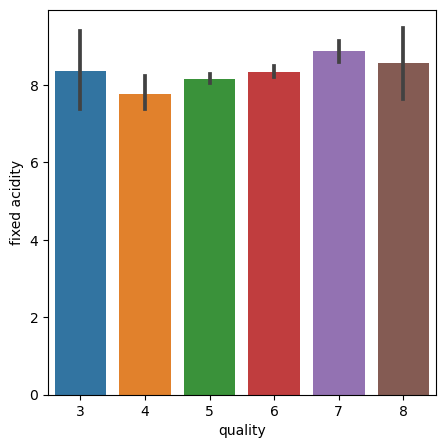

In [57]:
#fixed acidity vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=wq)
plt.show()

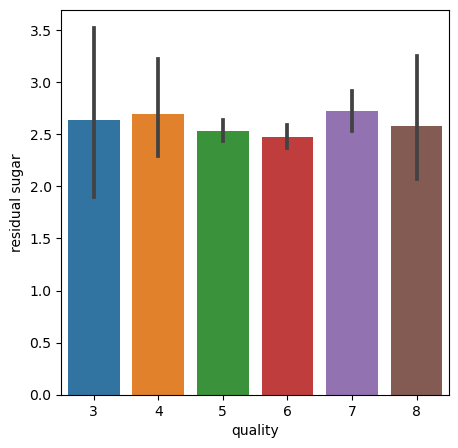

In [58]:
#residual sugar vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=wq)
plt.show()

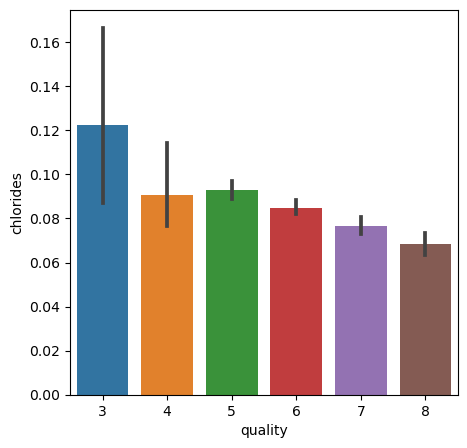

In [59]:
#chlorides vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wq)
plt.show()

<Figure size 500x500 with 0 Axes>

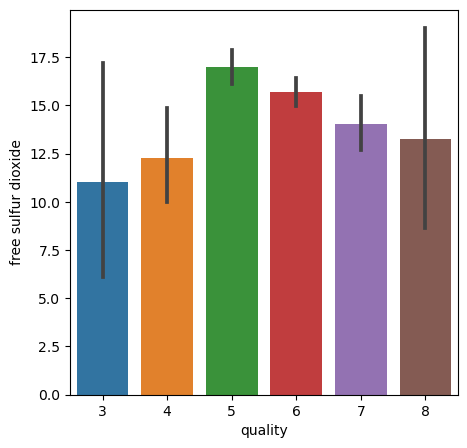

In [61]:
#free sulphur dioxide vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=wq)
plt.show()

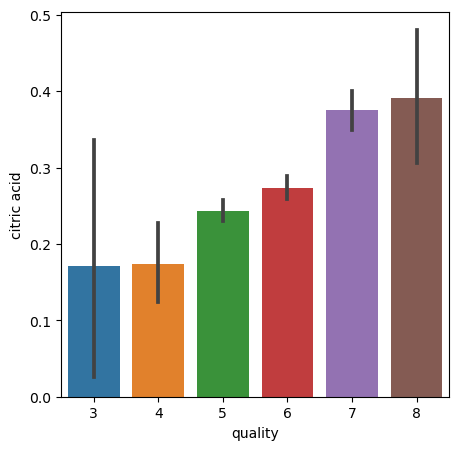

In [54]:
#total sulphur dioxide vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=wq)
plt.show()

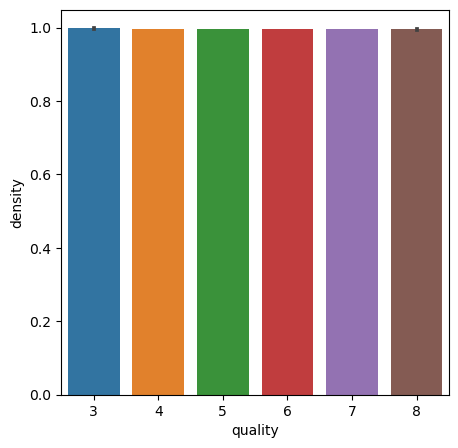

In [62]:
#density vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=wq)
plt.show()

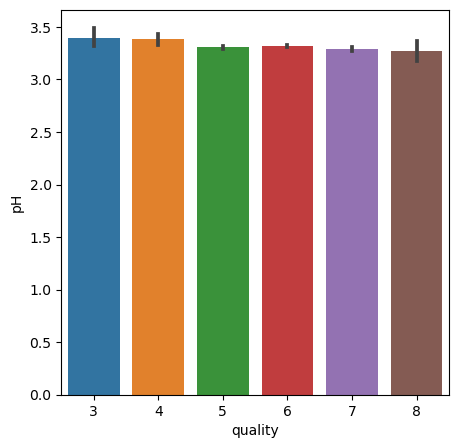

In [63]:
#pH vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=wq)
plt.show()

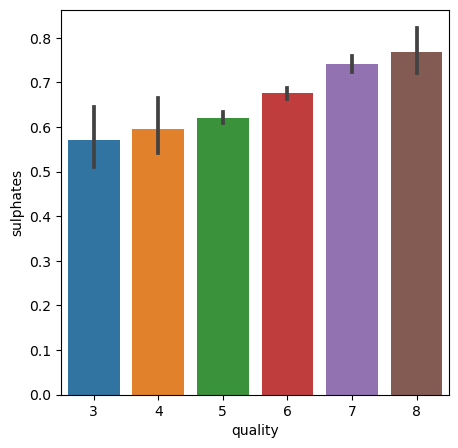

In [68]:
#sulphates vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=wq)
plt.show()

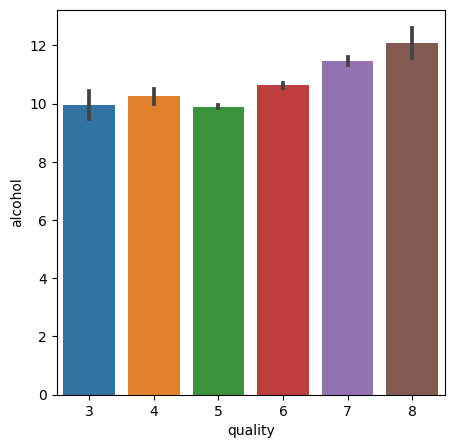

In [71]:
#alcohol vs quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wq)
plt.show()

In [28]:
#correlation
correlation=wq.corr() # corr function finds correlation between columns

<Figure size 1000x1000 with 0 Axes>

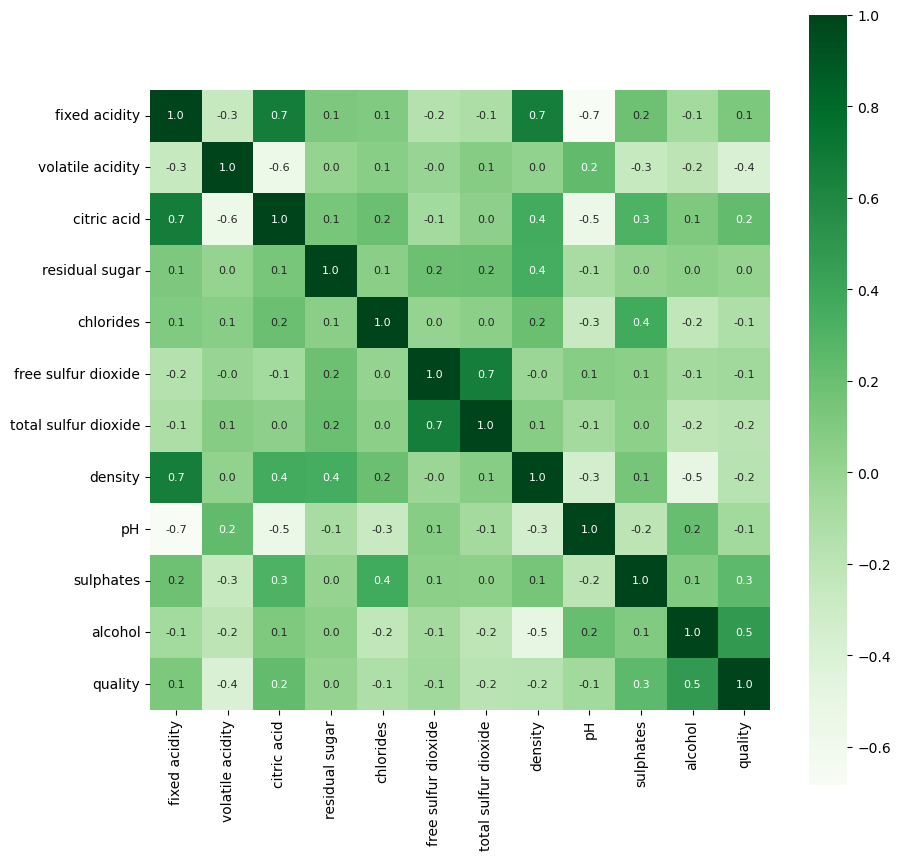

In [73]:
#plotting correlation through heatmap
plt.figure(figsize=(10,10))
# cbar represents color bar
# square is set to true so that each cell will be square shaped
# annot is the text shown adjacent to heatmap
# fmt allows to add string(text) values on the cell
# annot_kws is the dictionary type which accepts the key name size, you can specify size of text here
# cmap is the color of the heatmap you want to give
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Greens')
plt.show()

In [32]:
#Step 2: Data preprocessing
#dropping quality column because we want to predict that and we dont want it in x variable
X=wq.drop('quality',axis=1) # axis is 1 because we are dropping column, if rows then specify 0

In [33]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [34]:
#label binarisation or label encoding
# changing values of quality column into 0 and 1 where 1 represents good and zero represents bad
# lambda is a function in python,to write code in a single line.
# applying encoding and storing quality column in y variable
Y=wq['quality'].apply(lambda y:1 if y>=7 else 0) 

In [35]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [36]:
#train test split
# training data into X_train and labels for training data will be in Y_train
# testing data will go into X_test and labels for testing data will go into Y_test
# using train_test_split we are dividing data using test size as 0.2 meaning 20% testing data and 80% training data
# random state tells that data will be splitted the same way based on different executions
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [37]:
# checking the shape of the percentages of data split
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


In [42]:
#Step 3: Model training
#Random forest classifier
model=RandomForestClassifier()

In [43]:
# fitting the model to the training data 
model.fit(X_train,Y_train)

RandomForestClassifier()

In [45]:
#Step 4: Model evaluation
#accuracy on test data
X_test_pred=model.predict(X_test) # predicting labels from testing data
test_data_accuracy=accuracy_score(X_test_pred,Y_test) # calculating accuracy when we compare testing data and the labels

In [47]:
print("Accuracy=:",test_data_accuracy)

Accuracy=: 0.90625


In [49]:
#building a predictive system
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
input_data_array=np.asarray(input_data) # converting input data which is tuple into numpy array
#reshaping the data so the model knows that only 1 value needs to be predicted
input_data_reshaped=input_data_array.reshape(1,-1) # since we are giving only 1 input so ML model should work on 1 data point
pred=model.predict(input_data_reshaped) # predicting from the given inout data point
print(pred)

if(pred[0]==1): # if prediction in the output list element is equal to 1 then good wine
    print("good quality wine")
else:
    print("bad quality wine")

[1]
good quality wine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
